In [415]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
%matplotlib inline
sns.set_style('white')

In [416]:
# Load the data again. Keep air quality data, drop the index column
# and any missing data columns.
df = pd.read_csv(
    'https://vincentarelbundock.github.io/Rdatasets/csv/ISLR/Default.csv'
).iloc[:,1:].dropna()

# Recode strings to numeric.
df['default'] = np.where(df['default']=='Yes', 1, 0)
df['student'] = np.where(df['student']=='Yes', 1, 0)
names = df.columns
df = pd.DataFrame(preprocessing.scale(df), columns=names)

# Define the training and test sizes.
trainsize = int(df.shape[0] / 2)
df_test = df.iloc[trainsize:, :].copy()
df_train = df.iloc[:trainsize, :].copy()

Y_train = df_train['income'].values.reshape(-1, 1)
X_train = df_train.loc[:, ~(df_train.columns).isin(['income'])]

# Make some new features to capture potential quadratic and cubic
# relationships between solar radiation and day or temperature.
df_train['balance_student'] = df_train['balance'] * df_train['student']
df_train['balance_default'] = df_train['balance'] * df_train['default']
df_train['student_default'] = df_train['student'] * df_train['default']
df_train['balance_sqrt'] = (df_train['balance'] + 100) ** .5
df_train['balance2'] = (df_train['balance'] + 100) ** 2
df_train['balance3'] = (df_train['balance'] + 100) ** 3

X_train2 = df_train.loc[:, ~(df_train.columns).isin(['income'])]

# Test the simpler model with smaller coefficients.
Y_test = df_test['income'].values.reshape(-1, 1)
X_test = df_test.loc[:, ~(df_test.columns).isin(['income'])]

# Test the more complex model with larger coefficients.
df_test['balance_student'] = df_test['balance'] * df_test['student']
df_test['balance_default'] = df_test['balance'] * df_test['default']
df_test['student_default'] = df_test['student'] * df_test['default']
df_test['balance_sqrt'] = (df_test['balance'] + 100) ** .5
df_test['balance2'] = (df_test['balance'] + 100) ** 2
df_test['balance3'] = (df_test['balance'] + 100) ** 3
X_test2 = df_test.loc[:, ~(df_test.columns).isin(['income'])]


In [417]:
ridgeregrBig = linear_model.Ridge(alpha=10, fit_intercept=False)
ridgeregrBig.fit(X_train2, Y_train)
ridgescore = ridgeregrBig.score(X_train2, Y_train)
print(ridgescore)

0.573946428961


In [418]:
ridgeregrBig = linear_model.Ridge(alpha=100, fit_intercept=False)
ridgeregrBig.fit(X_train2, Y_train)
ridgescore = ridgeregrBig.score(X_train2, Y_train)
print(ridgescore)

0.573697657757


In [419]:
ridgeregrBig = linear_model.Ridge(alpha=500, fit_intercept=False)
ridgeregrBig.fit(X_train2, Y_train)
ridgescore = ridgeregrBig.score(X_train2, Y_train)
print(ridgescore)

0.568831167095


In [420]:
ridgeregrBig = linear_model.Ridge(alpha=1000, fit_intercept=False)
ridgeregrBig.fit(X_train2, Y_train)
ridgescore = ridgeregrBig.score(X_train2, Y_train)
print(ridgescore)

0.557076472888


In [421]:
ridgeregrBig = linear_model.Ridge(alpha=5000, fit_intercept=False)
ridgeregrBig.fit(X_train2, Y_train)
ridgescore = ridgeregrBig.score(X_train2, Y_train)
print(ridgescore)

0.431068331496


In [422]:
# Small number of parameters.
lass = linear_model.Lasso(alpha=.35)
lassfit = lass.fit(X_train, Y_train)
print('R² for the model with few features:')
print(lass.score(X_train, Y_train))
origparams = np.append(lassfit.coef_, lassfit.intercept_)
print('\nParameter estimates for the model with few features:')
print(origparams)

# Large number of parameters.
lassBig = linear_model.Lasso(alpha=.35)
lassBig.fit(X_train2, Y_train)
print('\nR² for the model with many features:')
print(lassBig.score(X_train2, Y_train))
origparams = np.append(lassBig.coef_, lassBig.intercept_)
print('\nParameter estimates for the model with many features:')
print(origparams)

R² for the model with few features:
0.450062579301

Parameter estimates for the model with few features:
[-0.         -0.40657726 -0.          0.00114596]

R² for the model with many features:
0.443633767129

Parameter estimates for the model with many features:
[  0.00000000e+00  -3.89351238e-01   0.00000000e+00  -0.00000000e+00
   0.00000000e+00  -0.00000000e+00   0.00000000e+00  -2.77688887e-04
  -7.09158792e-07   3.48711577e+00]


In [423]:
print(lass.score(X_test, Y_test))

print(lassBig.score(X_test2, Y_test))

0.445532251512
0.438046634591


In [424]:
# Try different values for Lambda
# Large number of parameters.
lassBig = linear_model.Lasso(alpha=1)
lassBig.fit(X_train2, Y_train)
print('\nR² for the model with many features:')

print(lassBig.score(X_test2, Y_test))


R² for the model with many features:
0.0192533316778


In [425]:
# Try different values for Lambda
# Large number of parameters.
lassBig = linear_model.Lasso(alpha=10)
lassBig.fit(X_train2, Y_train)
print('\nR² for the model with many features:')
print(lassBig.score(X_train2, Y_train))

print(lassBig.score(X_test2, Y_test))


R² for the model with many features:
0.0268340250892
0.0192662884312


In [426]:
# Try different values for Lambda
# Large number of parameters.
lassBig = linear_model.Lasso(alpha=100)
lassBig.fit(X_train2, Y_train)
print('\nR² for the model with many features:')
print(lassBig.score(X_train2, Y_train))

print(lassBig.score(X_test2, Y_test))


R² for the model with many features:
0.0268230988366
0.019386154497


In [427]:
lassBig = linear_model.Lasso(alpha=.1)
lassBig.fit(X_train2, Y_train)
print('\nR² for the model with many features:')
print(lassBig.score(X_train2, Y_train))

print(lassBig.score(X_test2, Y_test))


R² for the model with many features:
0.563089493672
0.55467279272


In [428]:
lassBig = linear_model.Lasso(alpha=0.01)
lassBig.fit(X_train2, Y_train)
print('\nR² for the model with many features:')
lassoscore = lassBig.score(X_train2, Y_train)
print(lassoscore)
print('The Ridge model is higher than the Lasso model by {}'.format(ridgescore - lassoscore))
print(lassBig.score(X_test2, Y_test))


R² for the model with many features:
0.573768104462
The Ridge model is higher than the Lasso model by -0.14269977296602948
0.563338914125


Ridge and Lasso are the same value when rounded to 3 decimal point at the following values for R2: [0.57376810446181925]
Which is the following lambda values: [0.01]


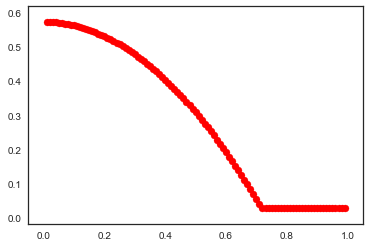

In [429]:
numb = np.arange(0.01, 1, 0.01)
yl = []
yr = []
for g in numb:
    lassBig = linear_model.Lasso(alpha=g)
    lassBig.fit(X_train2, Y_train)
    i = lassBig.score(X_train2, Y_train)
    yl.append(i)

for g in numb:
    ridgeregrBig = linear_model.Ridge(alpha=g, fit_intercept=False)
    ridgeregrBig.fit(X_train2, Y_train)
    i = ridgeregrBig.score(X_train2, Y_train)
    yr.append(i)
samelr = []
samelambda = []
numb2 = np.arange(0, len(yl), 1)
for p in numb2:
    if round(yl[p], 3) == round(yr[p], 3):
        samelr.append(yl[p])
        samelambda.append(numb[p])

print('Ridge and Lasso are the same value when rounded to 3 decimal point at the following values for R2: {}'.format(samelr))
print('Which is the following lambda values: {}'.format(samelambda))
    
plt.scatter(numb, yi, c='r')

plt.show()

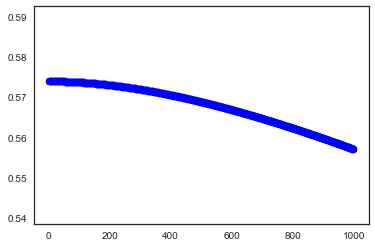

In [430]:
numb = np.arange(1, 1000, 1)

yr2 = []

for g in numb:
    ridgeregrBig = linear_model.Ridge(alpha=g, fit_intercept=False)
    ridgeregrBig.fit(X_train2, Y_train)
    i = ridgeregrBig.score(X_train2, Y_train)
    yr2.append(i)
    
plt.scatter(numb, yr2, c='b')

plt.show()